In [1]:
import os
from pathlib import Path
from glob import glob

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from adad.utils import create_dir

In [2]:
PATH_ROOT = Path(os.getcwd()).absolute().parent.parent
print(PATH_ROOT)

c:\Users\lukex\workspace\applicabilityDomain


In [3]:
path_results = os.path.join(PATH_ROOT, 'results', 'KNeighborsClassifier_DAIndexDelta')
print('Dir for 1 clf:\n', path_results)

path_scores = sorted(glob(os.path.join(path_results, '*_scores.csv')))
print('\nResults from 1 dataset:\n', path_scores[0])

score_files = [os.path.basename(p) for p in path_scores]
print('\nAll datasets:')
print(*score_files, sep='\n')

Dir for 1 clf:
 c:\Users\lukex\workspace\applicabilityDomain\results\KNeighborsClassifier_DAIndexDelta

Results from 1 dataset:
 c:\Users\lukex\workspace\applicabilityDomain\results\KNeighborsClassifier_DAIndexDelta\Ames_scores.csv

All datasets:
Ames_scores.csv
BBBP_scores.csv
CYP1A2_scores.csv
Cancer_scores.csv
HIV_scores.csv
Liver_scores.csv
hERG_scores.csv


In [4]:
# Heat map for acc_test, sensitivity/recall/TPR, specificity/TNR, balanced accuracy (BA)
df_knn_ames = pd.read_csv(path_scores[0])
df_knn_ames

,cv,acc_train,acc_test,sensitivity,specificity,auc,perm_auc
0,cv1,0.846272,0.775730,0.801429,0.745847,0.586808,0.569278
1,cv2,0.851681,0.762490,0.791130,0.729236,0.576484,0.577008
2,cv3,0.846878,0.788624,0.801144,0.774086,0.602981,0.576957
3,cv4,0.848991,0.769408,0.795422,0.739203,0.547772,0.568581
4,cv5,0.845533,0.784012,0.811429,0.752080,0.619296,0.586751


In [5]:
df_knn_ames.mean(axis=0, numeric_only=True)

acc_train      0.847871
acc_test       0.776053
sensitivity    0.800111
specificity    0.748090
auc            0.586668
perm_auc       0.575715
dtype: float64

In [6]:
path_classifiers = sorted(glob(os.path.join(PATH_ROOT, 'results', '*DAIndexDelta')))
print(*path_classifiers, sep='\n')

c:\Users\lukex\workspace\applicabilityDomain\results\KNeighborsClassifier_DAIndexDelta
c:\Users\lukex\workspace\applicabilityDomain\results\NNClassifier_DAIndexDelta
c:\Users\lukex\workspace\applicabilityDomain\results\RandomForestClassifier_DAIndexDelta
c:\Users\lukex\workspace\applicabilityDomain\results\SVC_DAIndexDelta


In [7]:
df = pd.DataFrame({
    'Dataset': [],
    'Classifier': [],
    'Test Accuracy': [],
    'Sensitivity': [],
    'Specificity': [],
    'Balanced Accuracy': [],
})

CLF_NAMES = ['KNN', 'NN', 'RF', 'SVM']

for clf, path_clf in zip(CLF_NAMES, path_classifiers):
    for filename in score_files:
        _path_data = os.path.join(path_clf, filename)
        _df = pd.read_csv(_path_data)
        mean_score = _df.mean(axis=0, numeric_only=True)
        dataset = filename.split('_')[0]
        sensitivity = mean_score['sensitivity']
        specificity =  mean_score['specificity']
        ba = (sensitivity + specificity) / 2.
        row = [dataset, 
               clf,
               mean_score['acc_test'],
               sensitivity,
               specificity,
               ba,
        ]
        df.loc[len(df.index)] = row

In [8]:
df

,Dataset,Classifier,Test Accuracy,Sensitivity,Specificity,Balanced Accuracy
0,Ames,KNN,0.776053,0.800111,0.748090,0.774101
1,BBBP,KNN,0.890000,0.951792,0.686021,0.818906
2,CYP1A2,KNN,0.787842,0.771981,0.801543,0.786762
3,Cancer,KNN,0.578600,0.614213,0.539945,0.577079
4,HIV,KNN,0.970015,0.357383,0.991878,0.674631
5,Liver,KNN,0.615961,0.780077,0.264816,0.522447
6,hERG,KNN,0.740621,0.659911,0.789813,0.724862
7,Ames,NN,0.798647,0.834992,0.756383,0.795688
8,BBBP,NN,0.861500,0.950489,0.567742,0.759115
9,CYP1A2,NN,0.807481,0.813785,0.802046,0.807916


In [9]:
# Create directory to save the plots
path_output = os.path.join(PATH_ROOT, 'plot_results', 'classifier_score')
create_dir(path_output)
df.to_csv(os.path.join(path_output, 'classifier_score.csv'), index=False)

In [10]:
plt.rc('font', size=14)

In [11]:
def create_heatmap(df, col, fontsize=17, show_title=True):
    heatmap_data = df.pivot('Dataset', 'Classifier', col) * 100.

    plt.rc('font', size=fontsize-3)
    plt.figure(figsize=(4.5, 4))
    sns.heatmap(heatmap_data, cmap='YlGn', annot=True, fmt='.1f', vmin=50., vmax=100.)
    plt.xlabel('Classifier', fontsize=fontsize-2)
    plt.ylabel('Dataset', fontsize=fontsize-2)
    if show_title:
        plt.title(f'{col} (%)', fontsize=fontsize)
    plt.tight_layout()
    plt.savefig(os.path.join(path_output, f'{col}'.replace(' ', '')) + '.pdf', dpi=300)

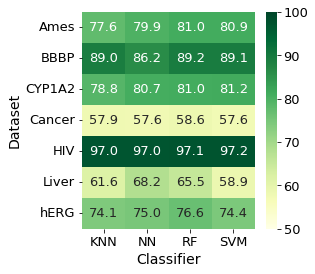

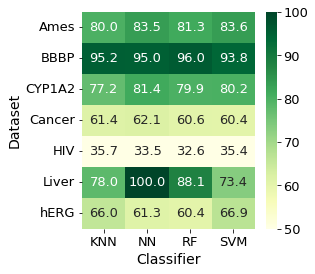

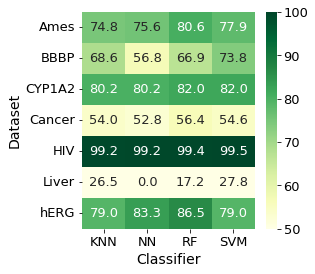

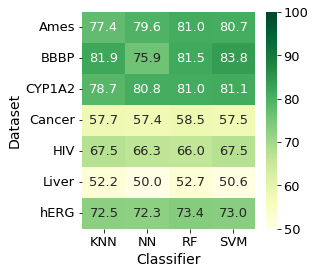

In [12]:
for col in df.columns[2:]:
    create_heatmap(df, col, fontsize=16, show_title=False)
